# ACTIVIDAD NUMERO 2

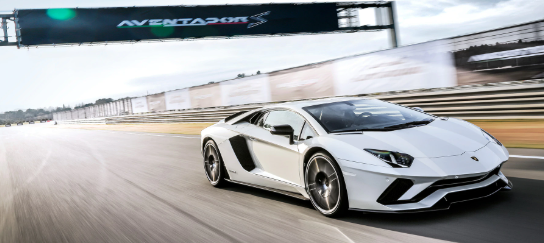

In [2]:
from IPython.display import Image
Image(filename='auto.PNG')

In [3]:
#guardar todos los archivos del bucket gs://python-files-datahack/data/retail-data/by-day/
from google.cloud import storage
from io import StringIO
import pandas as pd
client = storage.Client()
bucket_name = "python-files-datahack"
bucket = client.get_bucket(bucket_name)
folder='data/retail-data/by-day/'
files=bucket.list_blobs(prefix=folder)
#Listamos el nombre de todos los archivos
fileList=[file.name for file in files if '.' in file.name]

In [4]:
#se unifica todos los archivos
total_lista=len(fileList)
data_global=pd.read_csv('gs://python-files-datahack/'+fileList[0])
for i in range(1,total_lista):
    archivo='gs://python-files-datahack/'+fileList[i]
    data_temp=pd.read_csv(archivo)
    data_global = pd.concat([data_global, data_temp], ignore_index=True)
    

In [5]:
data_global.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [56]:
data_global.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

           InvoiceDate  UnitPrice  CustomerID         Country  
0  2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2  2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3  2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4  2010-12-01 08:26:00       3.39     17850.0  United Kingdom

### Generar un archivo parquet en GCS que indique el total de ventas por pais del mes de diciembre 2012

In [55]:
#total de ventas por pais del mes de diciembre 2012
df_dic2012=data_global[data_global.InvoiceDate.between("2011-12-01 00:00:00", "2011-12-31 23:59:59", inclusive=True)]
vta_dic2012=df_dic2012.groupby(["Country"])["UnitPrice"].agg([sum])
vta_dic2012.head()
#Guarda archivo en parquet
#vta_dic2012.to_parquet("gs://python-files-datahack/data/vtas_dic2012_rudy_enero.parquet", engine="pyarrow")

sum
Country                
Austria           64.58
Belgium          274.04
Channel Islands   24.85
Cyprus            69.35
Denmark           35.20

### Generar un grafico que muestra los diez articulosmas vendidos en el mes

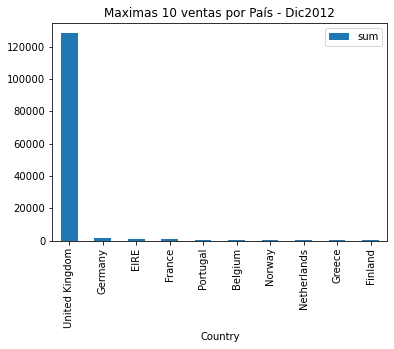

In [37]:
import matplotlib.pyplot as plt
vta_dic2012_order=vta_dic2012.sort_values("sum", ascending=False)
vta_dic2012_max10=vta_dic2012_order.head(10)
vta_dic2012_max10.plot(kind= "bar",title="Maximas 10 ventas por País - Dic2012")
plt.show()

### Consolidando todo el mes, se debe elaborar un archivo csv de cantidad de unidades de producto vendidas por dia indicando en una nueva columna si supera las 100 unidades vendidas como Trending caso contrario Not Trending

In [57]:
df_dic2012_trending=df_dic2012.groupby(["InvoiceDate"])["Quantity"].agg([sum])
df_dic2012_trending["Valida_trending"] = df_dic2012_trending["sum"].apply(lambda x: "Trending" if x >= 100 else "Not Trending")
df_dic2012_trending
#Guarda archivo en csv
#df_dic2012_trending.to_csv("gs://python-files-datahack/data/df_dic2012_trending_rudy_enero.csv")

sum Valida_trending
InvoiceDate                             
2011-12-01 08:12:00   -8    Not Trending
2011-12-01 08:14:00   -4    Not Trending
2011-12-01 08:18:00   -7    Not Trending
2011-12-01 08:23:00   -4    Not Trending
2011-12-01 08:25:00   -2    Not Trending
...                  ...             ...
2011-12-09 12:23:00   76    Not Trending
2011-12-09 12:25:00  120        Trending
2011-12-09 12:31:00  278        Trending
2011-12-09 12:49:00   66    Not Trending
2011-12-09 12:50:00  105        Trending

[899 rows x 2 columns]

### Implementar la clase producto, que tenga como variables: precio, descripcion. Como metodos convertir_soles(tipoCambio) el cual devuelva el monto en soles del valor del producto. Probar con 3 productos de la data.

In [63]:
df_dic2012.head()

InvoiceNo StockCode                         Description  Quantity  \
516384   C579889     23245          SET OF 3 REGENCY CAKE TINS        -8   
516385   C579890     84947   ANTIQUE SILVER TEA GLASS ENGRAVED        -1   
516386   C579890     23374             RED SPOT PAPER GIFT BAG        -1   
516387   C579890     84945  MULTI COLOUR SILVER T-LIGHT HOLDER        -2   
516388   C579891     23485       BOTANICAL GARDENS WALL CLOCK         -1   

                InvoiceDate  UnitPrice  CustomerID         Country  
516384  2011-12-01 08:12:00       4.15     13853.0  United Kingdom  
516385  2011-12-01 08:14:00       1.25     15197.0  United Kingdom  
516386  2011-12-01 08:14:00       0.82     15197.0  United Kingdom  
516387  2011-12-01 08:14:00       0.85     15197.0  United Kingdom  
516388  2011-12-01 08:18:00      25.00     13644.0  United Kingdom

In [72]:
class producto:
  def __init__(self, descripcion,precio):
    self.precio = float(precio)
    self.descripcion = descripcion
 
  def convertir_soles(self,tipoCambio):
        valor_soles = round(float(tipoCambio)*self.precio,2)
        print(f"Producto {self.descripcion} vale {valor_soles} soles")
    

producto1=producto("SET OF 3 REGENCY CAKE TINS",4.15)
producto1.convertir_soles(3.33)

producto2=producto("ANTIQUE SILVER TEA GLASS ENGRAVED",1.25)
producto2.convertir_soles(3.31)

producto3=producto("RED SPOT PAPER GIFT BAG	",0.82)
producto3.convertir_soles(3.35)

Producto SET OF 3 REGENCY CAKE TINS vale 13.82 soles
Producto ANTIQUE SILVER TEA GLASS ENGRAVED vale 4.14 soles
Producto RED SPOT PAPER GIFT BAG	 vale 2.75 soles


### Copiar la base de datos de SQlite y crear una nueva tabla llamada 'producto' e insertar 3 valores.

In [1]:
!gsutil cp "gs://python-files-datahack/data/flight-data/jdbc/my-sqlite.db" .

Copying gs://python-files-datahack/data/flight-data/jdbc/my-sqlite.db...
/ [1 files][ 11.0 KiB/ 11.0 KiB]                                                
Operation completed over 1 objects/11.0 KiB.                                     


In [12]:
#CONECTARSE
from sqlalchemy import create_engine
engine = create_engine('sqlite:///my-sqlite.db', echo=False)
connection = engine.connect()

In [13]:
from sqlalchemy import MetaData, Table
metadata = MetaData()

In [24]:
from sqlalchemy import (Table, Column, String, Integer, Boolean)
from sqlalchemy import MetaData
metadata = MetaData()
pacientes = Table('producto', metadata,
               Column('id', Integer()),
               Column('descripcion', String(255)),
               Column('precio', Integer())
           )
metadata.create_all(engine)
engine.table_names()

['flight_info', 'producto']

In [25]:
productos = Table('producto', metadata, autoload=True,
autoload_with=engine)
print(repr(productos))

Table('producto', MetaData(bind=None), Column('id', Integer(), table=<producto>), Column('descripcion', String(length=255), table=<producto>), Column('precio', Integer(), table=<producto>), schema=None)


In [26]:
print(productos.columns.keys())

['id', 'descripcion', 'precio']


In [29]:
#Agregamos data de prueba
from sqlalchemy import insert
stmt = insert(productos)
valores = [
        {'id': 1, 'descripcion': 'galleta', 'precio': 10},
        {'id': 2, 'descripcion': 'chocolate', 'precio': 5},
        {'id': 3, 'descripcion': 'fideo', 'precio': 25}
]
result_proxy = connection.execute(stmt, valores)
print(result_proxy.rowcount)

3
